# Pandas Lab 3 - Grouping and Presenting Data
### Lehner White

In [1]:
import numpy as np
import pandas as pd
from pydataset import data
from matplotlib import pyplot as plt

### Problem 1

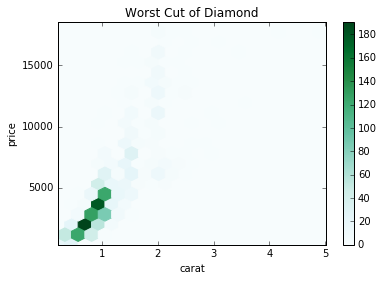

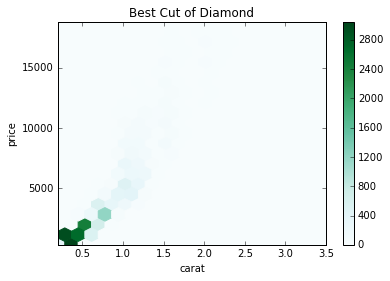

In [2]:
diamonds = data('diamonds')
cuts= diamonds.groupby('cut')
worst_cut = cuts.get_group('Fair')
best_cut = cuts.get_group('Ideal')
worst_cut.plot(kind='Hexbin', x='carat', y='price', gridsize=20, sharex=False)
plt.title('Worst Cut of Diamond')
plt.show()
best_cut.plot(kind='Hexbin', x='carat', y='price', gridsize=20, sharex=False)
plt.title('Best Cut of Diamond')
plt.show()

We see using these plots that the cut of the diamond will change the effect of the carat on the price. For a worse cut of diamond we see that the carat of the diamond will have a larger efect on the price. Whereas, for the best cut of diamond the carat will have a smaller effect on the price of the diamond. 

#### Problem 2

In [3]:
titanic = pd.read_csv('titanic.csv')
towns = titanic.groupby('Embarked')
means = towns.mean()
print means['Survived']

Embarked
C    0.555556
Q    0.357724
S    0.332604
Name: Survived, dtype: float64


In [4]:
pclass = titanic.groupby('Pclass')
c_means = pclass.mean()
print titanic.pivot_table('Survived', index='Embarked', columns='Sex')
print''
print titanic.pivot_table('Survived', index='Pclass', columns='Embarked')
print ''
print titanic.pivot_table('Survived', index='Pclass', columns=['Embarked','Sex'])

Sex         female      male
Embarked                    
C         0.902655  0.305732
Q         0.616667  0.111111
S         0.680412  0.170144

Embarked         C         Q         S
Pclass                                
1.0       0.687943  0.666667  0.559322
2.0       0.571429  0.285714  0.417355
3.0       0.366337  0.353982  0.210101

Embarked         C                   Q                   S          
Sex         female      male    female      male    female      male
Pclass                                                              
1.0       0.971831  0.400000  1.000000  0.000000  0.956522  0.305556
2.0       1.000000  0.294118  1.000000  0.000000  0.870968  0.134228
3.0       0.709677  0.214286  0.589286  0.122807  0.395349  0.144809


At first it appeared as though the town that you came did have an effect on the chance of survival, but upon further examination it appears that this held to be less true when the data was segregated by class, and even less so when you look at the data seperated by sex, as no males from Q survived from first and second class.

#### Problem 3

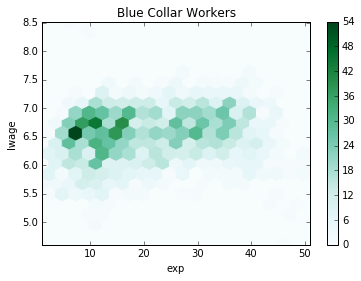

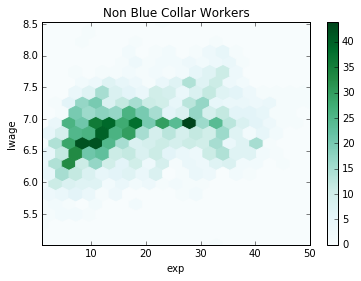

In [5]:
df = data('Wages')

blue = df.groupby('bluecol')
south = df.groupby('south')
married = df.groupby('married')

blue_collar = blue.get_group('yes')
not_blue_collar = blue.get_group('no')

blue_collar.plot(kind='Hexbin', x='exp', y='lwage', gridsize=20, sharex=False)
plt.title('Blue Collar Workers')
plt.show()

not_blue_collar.plot(kind='Hexbin', x='exp', y='lwage', gridsize=20, sharex=False)
plt.title('Non Blue Collar Workers')
plt.show()

These plots show the relation between Years of Expience and Wage for those working blue collar and non blue collar jobs

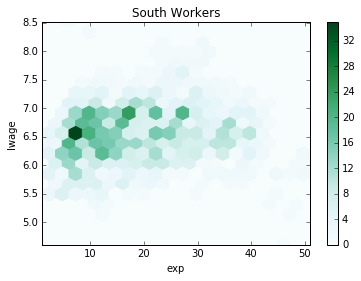

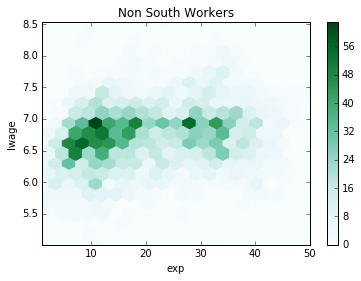

In [6]:
southern = south.get_group('yes')
not_south = south.get_group('no')

southern.plot(kind='Hexbin', x='exp', y='lwage', gridsize=20, sharex=False)
plt.title('South Workers')
plt.show()

not_south.plot(kind='Hexbin', x='exp', y='lwage', gridsize=20, sharex=False)
plt.title('Non South Workers')
plt.show()

These plots show the relation between Years of Expience and Wage for those working souther and non southern workers

In [7]:
print df.columns

Index([u'exp', u'wks', u'bluecol', u'ind', u'south', u'smsa', u'married',
       u'sex', u'union', u'ed', u'black', u'lwage'],
      dtype='object')


In [8]:
print df.pivot_table('lwage', index='ed', columns='sex')

sex    female      male
ed                     
4         NaN  6.038064
5         NaN  6.436119
6         NaN  6.423666
7    5.825802  6.365710
8    5.616380  6.476596
9    5.336400  6.524452
10   5.944956  6.555502
11   6.047507  6.637733
12   6.236938  6.658708
13   6.551297  6.596242
14   6.211737  6.794155
15   6.585107  6.910311
16   6.438568  6.955580
17   6.760007  7.003751


This table shows the average wage for individuals seperated by sex and years of education

In [9]:
print df.pivot_table('lwage', index='black', columns='sex')

sex      female      male
black                    
no     6.307536  6.741650
yes    6.074250  6.517691


This table shows the average wage for individuals seperated by sex and whether or not they are black

In [10]:
print df.pivot_table('lwage', index='married', columns='sex')

sex        female      male
married                    
no       6.251497  6.610825
yes      6.400442  6.740894


This table shows the average wage for individuals seperated by sex and whether or not they are black

This data compiles comparisons for wages, measured as log wages, for various demographics of individuals. From the data shown we earn a few different things. In the plots we learn that there is a larger effect stemming from years of experience for non blue collar workers than for blue collar workers. This may in part be due to the nature of the jobs. In blue collar jobs there may be significantly less upward mobility than in other jobs. We also see that this disparity is not as prevelent between those working in the south and those not in the south. 

The pivot tables show the gender wage gap as reflected in different demographics. For middle levels of education, we see that there is a much smaller gender wage gap than at low and high levels of education. The gender wage gap is similar between black and non black individuals. In the last pivot table we also observe that individuals who are married tend to make more money than those who are not. This may be due to older ages for married individuals on average. 

### Source

Online complements to Baltagi (2001).

http://www.wiley.com/legacy/wileychi/baltagi/

### References

Baltagi, Badi H. (2003) _Econometric Analysis of Panel Data_, 2nd ed., John
Wiley and Sons.

Cornwell, C. and P. Rupert (1988) "Efficient estimation with panel data: an
empirical comparison of instrumental variables estimators", _Journal of
Applied Econometrics_, **3**, 149-155\.